# Cancer Prediction by using Cross Validations Methods

1.In this problem we have to use 30 different columns and we have to predict the Stage of Breast Cancer M (Malignant) and B (Bengin)

2.Attribute Information:

(1) ID number

(2) Diagnosis (M = malignant, B = benign)

(3-32) Here column number 3- 32 are divided into three parts first is Mean (3-13), Stranded Error(13-23) and Worst(23-32) and each contain 10 parameter (radius, texture,area, perimeter, smoothness,compactness,concavity,concave points,symmetry and fractal dimension)
"10" real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g). concavity (severity of concave portions of the contour)

h). concave points (number of concave portions of the contour)

i). symmetry

j). fractal dimension ("coastline approximation" - 1)



3.Here Mean means the means of the all cells, standard Error of all cell and worst means the worst cell

###### importing all library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression #1
from sklearn.naive_bayes import GaussianNB          #2
from sklearn.linear_model import SGDClassifier      #3
from sklearn.neighbors import KNeighborsClassifier   #4
from sklearn.tree import DecisionTreeClassifier     #5
from sklearn.ensemble import RandomForestClassifier #6
from sklearn.svm import SVC #7

from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit



In [2]:
df = pd.read_csv(r'E:\DS course material\brestcancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
#Find out the null values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
#### we found "id,last column" are unnessasury added so remove that columns

df.drop(['id', 'Unnamed: 32'], axis = 1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# find the unique values of output(Diagnosis)
df.diagnosis.unique()


array(['M', 'B'], dtype=object)

In [8]:
#as we known M mean the patient is possitive so put the value 1 and another will zero 
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# As I said above the data can be divided into three parts.lets divied the features according to their category
features_mean= list(df.columns[1:11])
features_serror= list(df.columns[11:20])
features_worst=list(df.columns[21:31])
print(features_mean)
print("**********************************************")
print(features_serror)
print("**********************************************")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
**********************************************
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se']
**********************************************
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


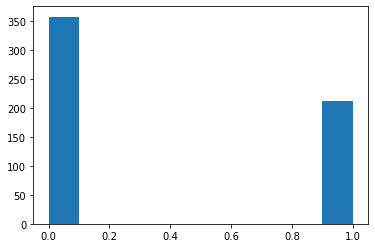

In [10]:
plt.hist(df['diagnosis'])
plt.show()

In [11]:
##### spilt the dataset into x independed and y depended values.
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

# <b>Data Analysis a little feature selection</b>
now we will take Features_mean part for Analysis after that other will use
</br>for that first we will find correlation of columns and choose one from the same valuable columns to predict the diagnosis result.

## By use of feature_mean part of dataset

### By using heatmap find the best important or non similar effected features

In [14]:
corrm = df[features_mean].corr()

<AxesSubplot:>

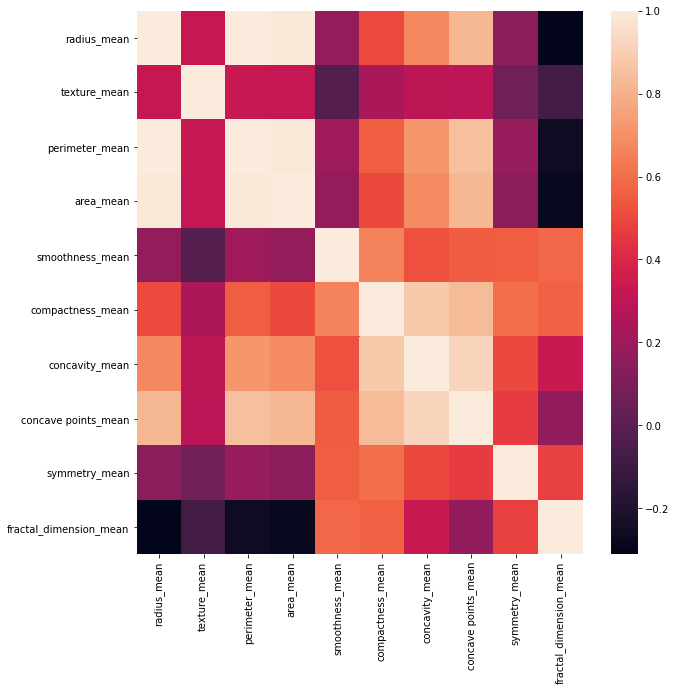

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corrm)

1.We will choose one feature from highly corelated features.According to heatmap highly corelated features are<br>
<b>"radius_mean,perimeter_mean,area_mean" , <br>
    "compactness_mean,concavity_mean,concave points_mean".</b><br>
2. Hardly related to other features are:-"texture,smoothness,symmerty,fractal_dimension".<br>
3.selected features are the variables which will use for prediction:-<b>"perimeter_mean, compactness_mean, texture_mean, smoothness_mean, symmerty_mean, fractal_dimension"</b>

In [16]:
pridict_var_mean = ['perimeter_mean', 'compactness_mean', 'texture_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean']

## By use of standard_error part of dataset

In [17]:
corr_error = df[features_serror].corr()

<AxesSubplot:>

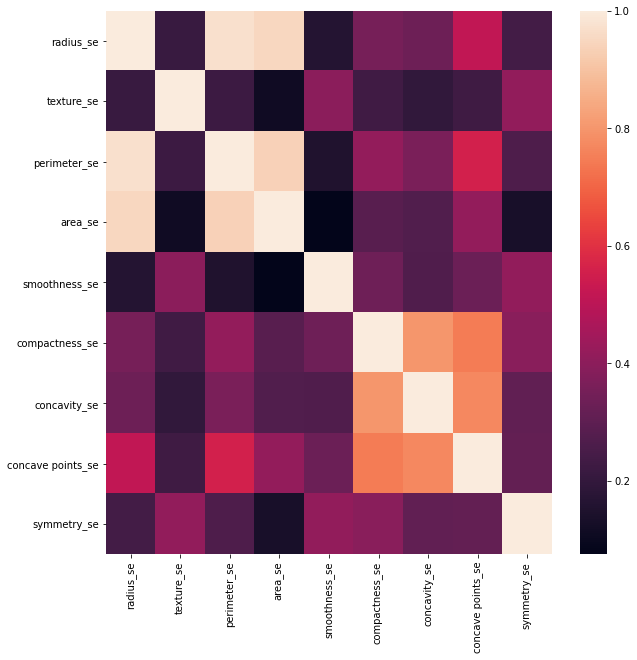

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_error)

## By use of features_worst part of dataset

In [19]:
corr_worst = df[features_worst].corr()

<AxesSubplot:>

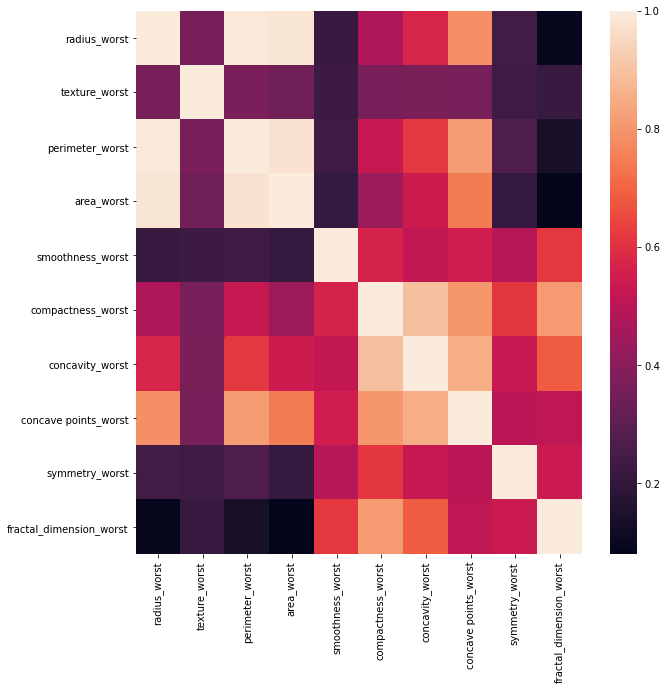

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_worst)

<b>HoldOut VALIDATION Approch: Train and Test Split</b><br>
Since this data set is not ordered, We are going to do a simple 70:30 split to create a training data set and a test data set.

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state=0)

In [23]:
xtrain = xtrain[pridict_var_mean]
xtest = xtest[pridict_var_mean]


In [24]:
xtrain.head()

,perimeter_mean,compactness_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean
478,73.99,0.08228,14.59,0.10460,0.1779,0.06574
303,66.86,0.06678,18.61,0.10680,0.1482,0.06600
155,78.27,0.06679,17.94,0.08654,0.1970,0.06228
186,118.60,0.08468,18.58,0.08588,0.1621,0.05425
101,43.79,0.07568,13.43,0.11700,0.1930,0.07818


### Another way to get to check the importan features in the prediction is using RandomForest

In [25]:
prediction_var = features_mean 
pv = x.columns# taking all features

In [26]:
train,test = train_test_split(df,test_size = 0.3, random_state=0)

In [27]:
x_train = train[x.columns]
x_test = test[x.columns]
y_train = train.diagnosis
y_test = test.diagnosis

In [28]:
x_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
478,11.490,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.01969,0.1779,0.06574,...,12.40,21.90,82.04,467.6,0.1352,0.2010,0.25960,0.07431,0.2941,0.09180
303,10.490,18.61,66.86,334.3,0.10680,0.06678,0.02297,0.01780,0.1482,0.06600,...,11.06,24.54,70.76,375.4,0.1413,0.1044,0.08423,0.06528,0.2213,0.07842
155,12.250,17.94,78.27,460.3,0.08654,0.06679,0.03885,0.02331,0.1970,0.06228,...,13.59,25.22,86.60,564.2,0.1217,0.1788,0.19430,0.08211,0.3113,0.08132
186,18.310,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.1234,0.2445,0.35380,0.15710,0.3206,0.06938
101,6.981,13.43,43.79,143.5,0.11700,0.07568,0.00000,0.00000,0.1930,0.07818,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.00000,0.00000,0.2932,0.09382


#This is the property of Random Forest classifier that it provide us the importance 
 of the features used

In [29]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(x_train,y_train)# now fit our model for traiing data
featimp = pd.Series(model.feature_importances_, index=pv).sort_values(ascending=False)
print(featimp)

concave points_worst       0.235493
radius_worst               0.096281
concave points_mean        0.095230
perimeter_worst            0.090901
area_worst                 0.078536
concavity_mean             0.055586
perimeter_mean             0.050383
concavity_worst            0.046457
radius_se                  0.028706
area_se                    0.026724
radius_mean                0.023179
compactness_mean           0.022754
area_mean                  0.019977
compactness_worst          0.018210
texture_worst              0.016128
symmetry_worst             0.012238
smoothness_worst           0.010441
fractal_dimension_worst    0.010040
perimeter_se               0.009038
texture_mean               0.007694
smoothness_mean            0.007562
concavity_se               0.006780
concave points_se          0.006266
smoothness_se              0.005023
symmetry_se                0.004186
compactness_se             0.003881
fractal_dimension_se       0.003437
symmetry_mean              0

In [30]:
model=RandomForestClassifier(n_estimators=100)# a simple random forest model
model.fit(x_train,y_train)# now fit our model for traiing data
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

ValueError: Length of passed values is 30, index implies 10.

In [38]:
# now lets take only top 5 important features given by RandomForest classifier
prediction_var1=['concave points_mean','perimeter_mean' , 'concavity_mean' , 'radius_mean','area_mean']      


In [39]:
train_x =train[prediction_var1]
test_x = test[prediction_var1]
train_y = train.diagnosis
test_y = test.diagnosis

In [40]:
NaiveBayes = GaussianNB()
logistic = LogisticRegression(random_state=101)
GradientDescent = SGDClassifier(loss='modified_huber', shuffle=True, random_state=101)
KNN = KNeighborsClassifier(n_neighbors=15,)
DT = DecisionTreeClassifier(max_depth=10, max_features=None, random_state=101, min_samples_leaf=10)
RandomForest = RandomForestClassifier(n_estimators= 5, criterion="entropy",random_state=101)
SVM = SVC(kernel="linear", C=0.025, random_state=101)

models = [NaiveBayes,logistic,GradientDescent,KNN,DT,RandomForest,SVM]

In [41]:
kfold_validation=KFold(10)
skfold=StratifiedKFold(n_splits=5)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
leave_validation=LeaveOneOut()

cross_val_fun = [kfold_validation,skfold,leave_validation,ssplit]

In [42]:
def models_acc(models,train,test,prediction_var,target,cv):
    for i in models:
        i.fit(train[prediction_var], train[target])
        prediction = i.predict(test[prediction_var])
        accuracy = metrics.accuracy_score(prediction,test[target])
        print(i,accuracy)
        print("Accuracy : %s" % "{0:.3%}".format(accuracy))
        print("************************************************")
        
            
            


    

In [43]:
models_acc(models,train,test,prediction_var1,"diagnosis",cross_val_fun)

GaussianNB() 0.9005847953216374
Accuracy : 90.058%
************************************************
LogisticRegression(random_state=101) 0.9122807017543859
Accuracy : 91.228%
************************************************
SGDClassifier(loss='modified_huber', random_state=101) 0.8888888888888888
Accuracy : 88.889%
************************************************
KNeighborsClassifier(n_neighbors=15) 0.9005847953216374
Accuracy : 90.058%
************************************************
DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, random_state=101) 0.9064327485380117
Accuracy : 90.643%
************************************************
RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=101) 0.9298245614035088
Accuracy : 92.982%
************************************************
SVC(C=0.025, kernel='linear', random_state=101) 0.9005847953216374
Accuracy : 90.058%
************************************************


In [44]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
metrics.accuracy_score(prediction,test_y)

0.9239766081871345

In [45]:
kf=KFold(n_splits=10)
kf.get_n_splits(df)
for train_idex,test_idex in kf.split(df):
    results=cross_val_score(model,train_idex,test_idex,cv=kfold_validation)
print("Cross Validation Score",np.mean(results))

ValueError: Found input variables with inconsistent numbers of samples: [398, 171]